# Prediction of Formation Energy of Solids Using Neural Network


This work was reported by Jha *et al.*[1] and in this exercise, we will implement, train, and validate a model to predict the formation energy of given solid using its formula as the input.


1. Jha, D., Ward, L., Paul, A., Liao, W.-K., Choudhary, A., Wolverton, C., & Agrawal, A. **(2018)**. ElemNet : Deep Learning the Chemistry of Materials From Only Elemental Composition. Scientific Reports, 8(1), 17593. http://doi.org/10.1038/s41598-018-35934-y

## Setup Runtime Install necessary packages

Set runtime to GPU.
Clone the repo.

In [1]:
!pip install numpy matplotlib pandas scikit-learn tensorflow-gpu==2.0

In [1]:
parent_dir = 'ML_Workshop/'

In [2]:
# import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Descriptor

The descriptor is the composition of the given system. The discriptor will be an array of length 86 (dataset contains only 86 elements).

### Load data

In [3]:
df = pd.read_csv(parent_dir + 'data/inorg/mp.csv')
df.head()

,formula,energy
0,Ge4Mg2O12Sn2,-2.167457
1,Cr6O16,-1.338311
2,AlBa2Fe3O8,-2.265546
3,Mg2Mo3O8,-2.300022
4,BiF6Mg,-2.932162


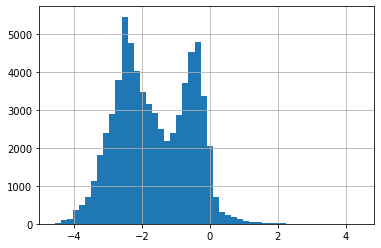

In [4]:
# visulaize the energy histogram
df['energy'].hist(bins=50)

### Calculate Descriptor

In [5]:
def parse_formula(formula):
    
    split = re.findall('[A-Z][^A-Z]*', formula)
    result = {}
    for el in split:
        head = el.rstrip('0123456789')
        tail = el[len(head):]
        result[head] = int(tail) if tail != '' else 1
    
    return result
    
parse_formula('Ge4Mg2O12Sn2')

{'Ge': 4, 'Mg': 2, 'O': 12, 'Sn': 2}

In [6]:
# build template for descriptor
elements = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 
            'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 
            'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 
            'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
desc_positions = dict(zip(elements, range(len(elements))))

In [7]:
print(desc_positions)

{'H': 0, 'Li': 1, 'Be': 2, 'B': 3, 'C': 4, 'N': 5, 'O': 6, 'F': 7, 'Na': 8, 'Mg': 9, 'Al': 10, 'Si': 11, 'P': 12, 'S': 13, 'Cl': 14, 'K': 15, 'Ca': 16, 'Sc': 17, 'Ti': 18, 'V': 19, 'Cr': 20, 'Mn': 21, 'Fe': 22, 'Co': 23, 'Ni': 24, 'Cu': 25, 'Zn': 26, 'Ga': 27, 'Ge': 28, 'As': 29, 'Se': 30, 'Br': 31, 'Kr': 32, 'Rb': 33, 'Sr': 34, 'Y': 35, 'Zr': 36, 'Nb': 37, 'Mo': 38, 'Tc': 39, 'Ru': 40, 'Rh': 41, 'Pd': 42, 'Ag': 43, 'Cd': 44, 'In': 45, 'Sn': 46, 'Sb': 47, 'Te': 48, 'I': 49, 'Xe': 50, 'Cs': 51, 'Ba': 52, 'La': 53, 'Ce': 54, 'Pr': 55, 'Nd': 56, 'Pm': 57, 'Sm': 58, 'Eu': 59, 'Gd': 60, 'Tb': 61, 'Dy': 62, 'Ho': 63, 'Er': 64, 'Tm': 65, 'Yb': 66, 'Lu': 67, 'Hf': 68, 'Ta': 69, 'W': 70, 'Re': 71, 'Os': 72, 'Ir': 73, 'Pt': 74, 'Au': 75, 'Hg': 76, 'Tl': 77, 'Pb': 78, 'Bi': 79, 'Ac': 80, 'Th': 81, 'Pa': 82, 'U': 83, 'Np': 84, 'Pu': 85}


In [8]:
def get_descriptor(formula):
    
    elem_counts = parse_formula(formula)
    desc = np.zeros(shape=86)
    for k, v in elem_counts.items():
        desc[desc_positions.get(k)] = v
        
    return desc

In [9]:
print(get_descriptor('Ge4Mg2O12Sn2'))

[ 0.  0.  0.  0.  0.  0. 12.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [10]:
# get datasets
x = []
y = []

for row in df.itertuples():
    x.append(get_descriptor(row.formula))
    y.append(float(row.energy))

x = np.stack(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(67847, 86)
(67847,)


In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)

print(X_train.shape)
print(X_test.shape)

(54277, 86)
(13570, 86)


## Model

We will start with a model with six hidden layers with [1024, 512, 256, 128, 64, 32] neurons. We will use relu activations, ADAM optimizer and mean squared error for loss function.

Architecture used in the paper is 1024x4-512x3-256x3-128x3-64x2-32x1-1. Dropout [0.2, 0.1, 0.3, 0.2].

In [12]:
model = Sequential([
    Dense(1024, input_shape=(86,), activation='relu'),  # x 4
    Dropout(0.2),
    Dense(512, activation='relu'),  # x 3
    Dropout(0.1),
    Dense(256, activation='relu'),  # x 3
    Dropout(0.3),
    Dense(128, activation='relu'),  # x 3
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])

In [13]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# print summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              89088     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [14]:
epochs = 100
history = model.fit(x=X_train[:4096], y=y_train[:4096], batch_size=32, validation_split=0.1, verbose=2, epochs=epochs)

Train on 3686 samples, validate on 410 samples
Epoch 1/100
3686/3686 - 4s - loss: 1.5726 - mae: 0.9398 - val_loss: 1.0557 - val_mae: 0.8066
Epoch 2/100
3686/3686 - 2s - loss: 0.7300 - mae: 0.6370 - val_loss: 0.4359 - val_mae: 0.4901
Epoch 3/100
3686/3686 - 2s - loss: 0.3181 - mae: 0.4176 - val_loss: 0.2184 - val_mae: 0.3181
Epoch 4/100
3686/3686 - 2s - loss: 0.2119 - mae: 0.3369 - val_loss: 0.1928 - val_mae: 0.3107
Epoch 5/100
3686/3686 - 2s - loss: 0.1800 - mae: 0.3102 - val_loss: 0.2620 - val_mae: 0.3853
Epoch 6/100
3686/3686 - 2s - loss: 0.1683 - mae: 0.3015 - val_loss: 0.1663 - val_mae: 0.3041
Epoch 7/100
3686/3686 - 2s - loss: 0.1440 - mae: 0.2776 - val_loss: 0.2040 - val_mae: 0.3591
Epoch 8/100
3686/3686 - 2s - loss: 0.1216 - mae: 0.2499 - val_loss: 0.1408 - val_mae: 0.2806
Epoch 9/100
3686/3686 - 2s - loss: 0.1095 - mae: 0.2398 - val_loss: 0.1337 - val_mae: 0.2560
Epoch 10/100
3686/3686 - 2s - loss: 0.1028 - mae: 0.2294 - val_loss: 0.1182 - val_mae: 0.2499
Epoch 11/100
3686/3686

Epoch 88/100
3686/3686 - 2s - loss: 0.0186 - mae: 0.0980 - val_loss: 0.0780 - val_mae: 0.1692
Epoch 89/100
3686/3686 - 2s - loss: 0.0215 - mae: 0.1019 - val_loss: 0.0775 - val_mae: 0.1716
Epoch 90/100
3686/3686 - 2s - loss: 0.0204 - mae: 0.1033 - val_loss: 0.0746 - val_mae: 0.1665
Epoch 91/100
3686/3686 - 2s - loss: 0.0179 - mae: 0.0966 - val_loss: 0.0746 - val_mae: 0.1659
Epoch 92/100
3686/3686 - 2s - loss: 0.0230 - mae: 0.1053 - val_loss: 0.0746 - val_mae: 0.1659
Epoch 93/100
3686/3686 - 2s - loss: 0.0212 - mae: 0.1044 - val_loss: 0.0796 - val_mae: 0.1679
Epoch 94/100
3686/3686 - 2s - loss: 0.0186 - mae: 0.0978 - val_loss: 0.0755 - val_mae: 0.1645
Epoch 95/100
3686/3686 - 3s - loss: 0.0178 - mae: 0.0954 - val_loss: 0.0731 - val_mae: 0.1642
Epoch 96/100
3686/3686 - 2s - loss: 0.0163 - mae: 0.0904 - val_loss: 0.0697 - val_mae: 0.1553
Epoch 97/100
3686/3686 - 2s - loss: 0.0157 - mae: 0.0907 - val_loss: 0.0748 - val_mae: 0.1663
Epoch 98/100
3686/3686 - 3s - loss: 0.0154 - mae: 0.0908 - v

## Visulaizing the training curves

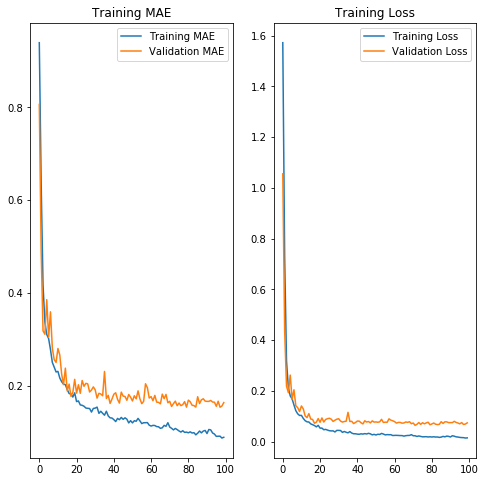

In [15]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAE')
plt.plot(epochs_range, val_acc, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()



## Predict

In [16]:
y_pred = model.predict(X_test[:256])

mse = mean_squared_error(y_test[:256], y_pred)
mae = mean_squared_error(y_test[:256], y_pred)

print('MAE for the prediction is {0} eV/atom and loss is {1}'.format(round(mae, 4), round(mse, 4)))

MAE for the prediction is 0.0816 eV/atom and loss is 0.0816
